#### Simple data analysis of Titanic data on Kaggle.
__[Data on Kaggle](https://www.kaggle.com/c/titanic/data)__

- Import Libraries
- Load and Explore Data
- Visualizations

#### Import Libraries

In [1]:
# Import data wrangling libraries
import pandas as pd
import numpy as np

# Import visualizations libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Show plots in this notebook
%matplotlib inline

# Change the working directory
import os
%cd D:\Kaggle\Titanic\data

D:\Kaggle\Titanic\data


#### Read Data

In [2]:
# load data
dfTrain = pd.read_csv('train.csv')

#### Explore Data
- Print few rows to see what we have got in this datasets
- Shape of the data
- Print summary of data using info

In [16]:
# Print few rows. By default .head() returns 5 rows but you can chnage it by giving it a number like, 3, below
dfTrain.head(2)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


- Columns
 - PassengerId is just a number of record in the table.
 - Survived: Passenger survived or not
 - Pclass: Ticket class
 - Name, Sex, Age: of passenger
 - SibSp: Sibling or Spouse on board. 1 means there are siblings or spouses
 - Parch: Parent or children on board. 1 means there are parent or children on board
 - Ticket: ticekt number
 - Fare: ticket price
 - Cabin: Cabin number
 - Embarked: from which port a passenger embarked

In [17]:
# lower column names - it's not needed but, I think, it would make our life easy to work with data.
dfTrain.columns = dfTrain.columns.str.lower()

In [18]:
# Sahpe of data - Rows and Columns
dfTrain.shape

(891, 12)

###### There are 891 rows and 12 columns

In [19]:
# Print summary of the table
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
passengerid    891 non-null int64
survived       891 non-null int64
pclass         891 non-null int64
name           891 non-null object
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
ticket         891 non-null object
fare           891 non-null float64
cabin          204 non-null object
embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##### .info() gives us consise but important summary. It is very useful for cleaning and feature engineering like data types, null/non-null values, columns, memorry usage. There are missing values in Age, Cabin and Embarked. 


In [22]:
# Let's see precisely how many values are missing - In this short dataset number of missing values should be enough but 
#in large datasets we might also need to see percentage of missing values.
dfTrain.isnull().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

- The 'age' column is very important - We will explore this in a while - and we have to fill it.
- 'cabin' column is missing more than 70% and it would be difficult to fill these missing vlaues. We will remove it.
###### We have to fix these null values at least for age.

##### We can also generate descriptive statisis - min, max, mean, freq etc. - using .describe() function

In [27]:
# 'all' means include all coulumns. Default will only include numeric.
dfTrain.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
passengerid,891,NaN,NaN,NaN,446,257.354,1,223.5,446,668.5,891
survived,891,NaN,NaN,NaN,0.383838,0.486592,0,0,0,1,1
pclass,891,NaN,NaN,NaN,2.30864,0.836071,1,2,3,3,3
name,891,891,"Salkjelsvik, Miss. Anna Kristine",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,714,NaN,NaN,NaN,29.6991,14.5265,0.42,20.125,28,38,80
sibsp,891,NaN,NaN,NaN,0.523008,1.10274,0,0,0,1,8
parch,891,NaN,NaN,NaN,0.381594,0.806057,0,0,0,0,6
ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fare,891,NaN,NaN,NaN,32.2042,49.6934,0,7.9104,14.4542,31,512.329


#### Above table gives us useful informatioin like:
- Name: Unique - Might be good for us in feature engineering.
- Age: average age is 29 years. The youngest pessenger is 4 months old and the oldest is 80
- Most: of the people embarked from S (Southampton) port
- Fare: It could also be a useful informatoin to check if there is any relation, in training dataset, between survived and people who paid more than average fare.
- sibsp and parch: Mostly people are travelling alone.

---

#### Visualization - Keep exploring
##### Now we have some understanding of data. We can keep exploring data like above but it might be a good idea to see data visually.

----

In [9]:
# Before any visualization let's create function which we will use to annotate plots.
def AnnotateBarPlot(snsPlot):
    for p in snsPlot.patches:
        snsPlot.annotate(format(p.get_height(), '.1f'), 
            (p.get_x() + p.get_width() / 2., p.get_height()), 
            ha = 'center', va = 'center', 
            xytext = (0, -10), 
            textcoords = 'offset points')

##### Survived by gender

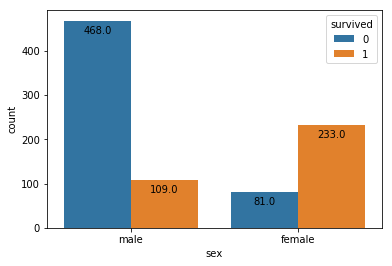

In [10]:
g = sns.countplot(data=dfTrain, x='sex', hue='survived')
AnnotateBarPlot(g)

###### From the above plot. We can see that there are totla 577 men and 314 women onboard but more than 70% women survived. Which makes sense. 

##### As, we are learning and playing with data so we can generate the above data using groupby like below

In [11]:
dfTrain.groupby(['sex','survived'])['survived'].count()

sex     survived
female  0            81
        1           233
male    0           468
        1           109
Name: survived, dtype: int64

##### We can also plot percentage of male/female survived using barplot of Seaborn. The default estimator is mean

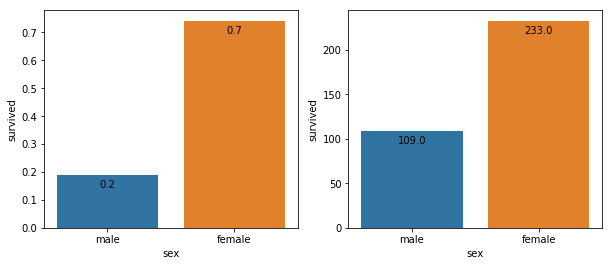

In [30]:
# number of subplots and theri widthXheight 
f,ax = plt.subplots(1,2, figsize=(10,4))

# Percentage of male/female survived
g = sns.barplot(data=dfTrain, x='sex', y='survived', ci=None, ax=ax[0])
AnnotateBarPlot(g)

# Number of male/female survived - estimator is sum, in above estimator is mean which is default
g = sns.barplot(data=dfTrain, x='sex', y='survived', estimator=sum, ci=None, ax=ax[1])
AnnotateBarPlot(g)

#### Survived by passenger class

survived    0    1  All
pclass                 
1          80  136  216
2          97   87  184
3         372  119  491
All       549  342  891
--------------------


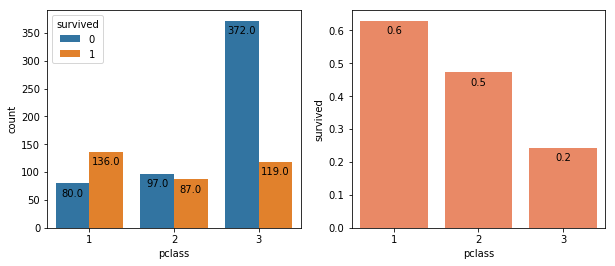

In [13]:
# Plot and print number of people survied by passenger class to see if there is any relation
print(pd.crosstab(dfTrain.pclass, dfTrain.survived, margins=True))
print('-'*20)

# number of subplots and theri widthXheight 
f,ax = plt.subplots(1,2, figsize=(10,4))

# Percentage of male/female survived
g = sns.countplot(data=dfTrain, x='pclass', hue='survived', ax=ax[0])
AnnotateBarPlot(g)

# Number of male/female survived - estimator is sum, in above estimator is mean which is default
g = sns.barplot(data=dfTrain, x='pclass', y='survived', color="coral", ci=None, ax=ax[1])
AnnotateBarPlot(g)

##### Most of the passenger (60%) survived and, only, 20% class 3 passenger survived.